### **Step 1 | Import Libraries**

In [39]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

### **Step 2 | Read Dataset**

In [40]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

### **Step 3 | Train Dataset**

In [41]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### **Step 3.1 | Dataset Basic Information**

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### **Conclusion:**
The train dataset contains 21 features and 2000 entries.
We have 21 variables including 20 independent variables and 1 dependent variable: price_range.
The features: clock_speed and m_dep have an float64 type. The rest of the features have an int64 type.
There is no missing value in the dataset.
We have 8 categorical variables: n_cores , price_range, blue, dual_sim, four_g, three_g, touch_screen, wifi
We have 13 numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, talk_time, sc_h, sc_w

### **Step 3.2 | Description of the data**

In [43]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### **Step 3.2.2 | Description of Numerical Variables**

In [44]:
numerical = ["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]
train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


### **Step 3.3 | Missing Data Visualization**

In [45]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

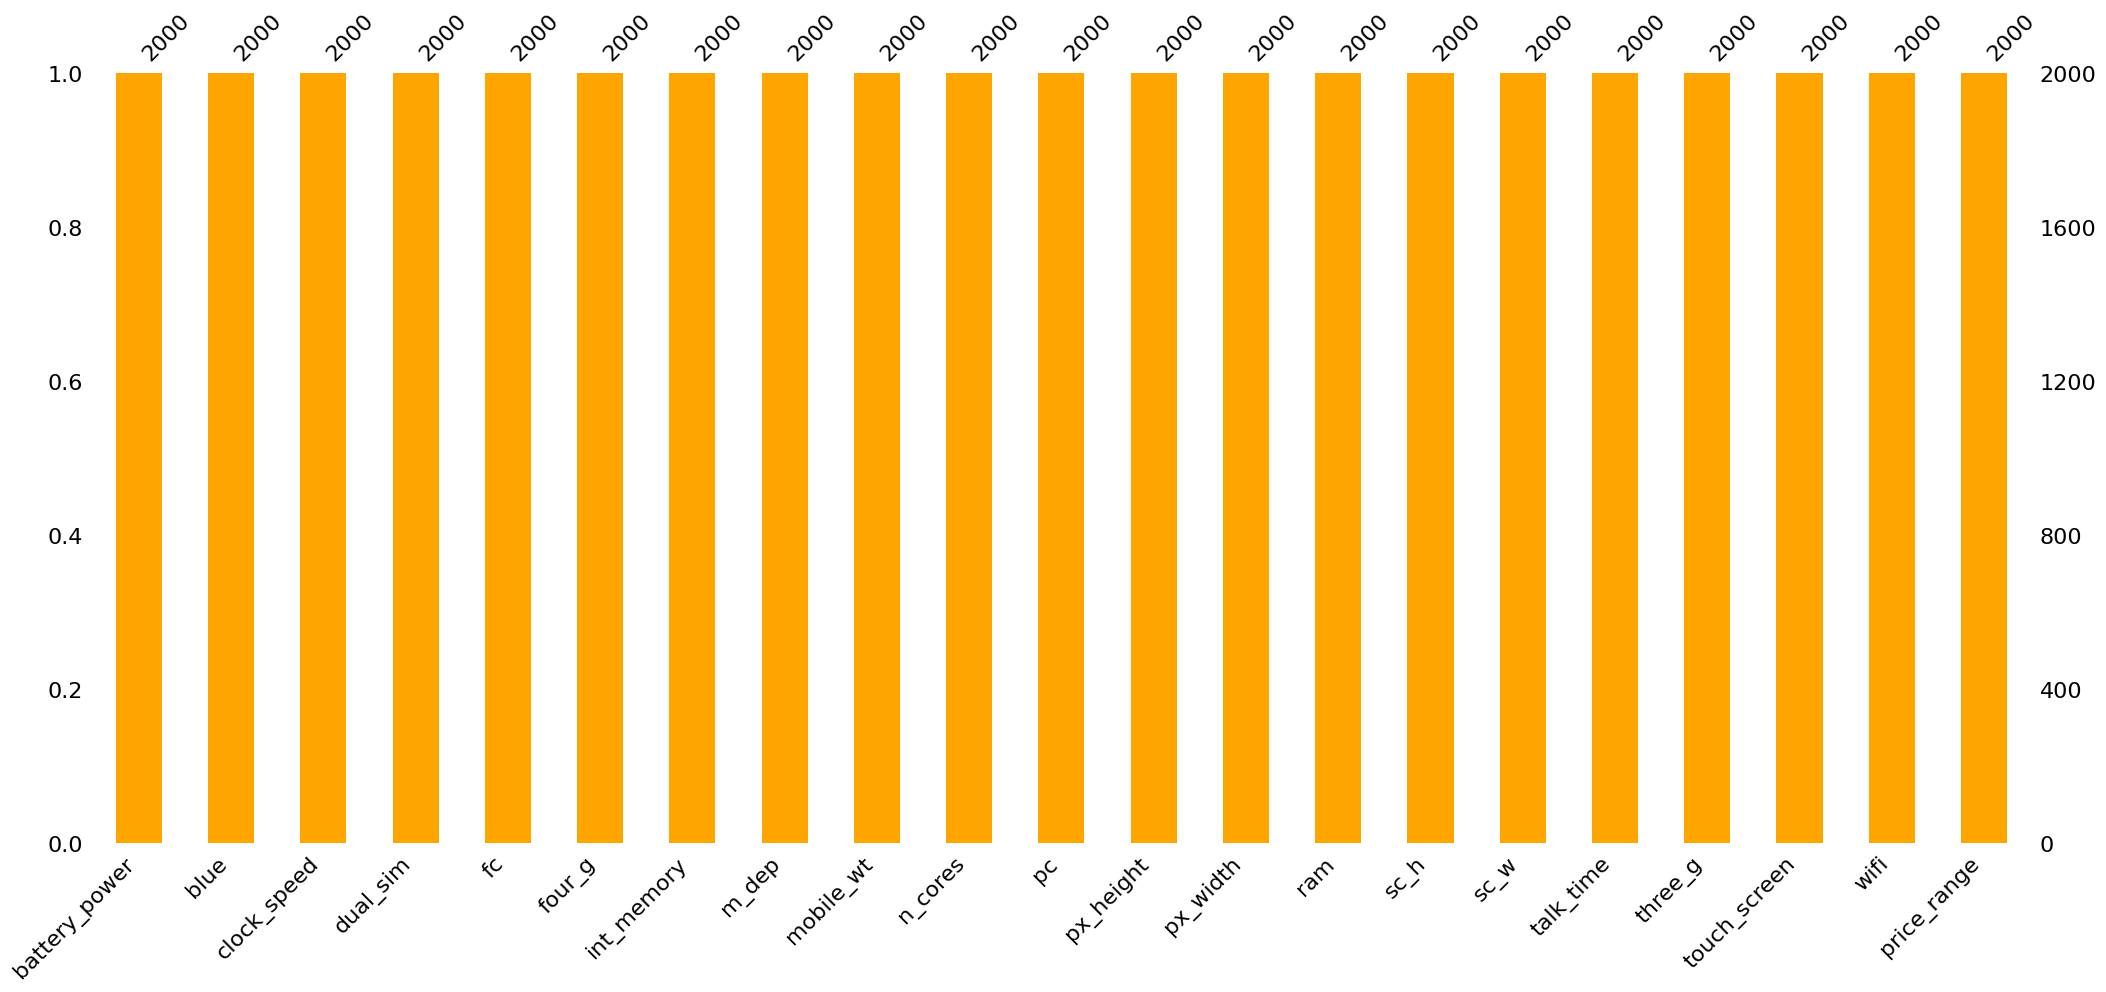

In [46]:
msno.bar(train, color = "orange")

### **`Conclusion:`**
There are no missing data in the train dataset.

### **Step 3.4 | Duplicated Data**

In [47]:
print("Duplicated Data:",train.duplicated().sum())

Duplicated Data: 0


### **Conclusion:**
There aren't any duplicated data in the train dataset.

### **Step 3.5 | Pearson Correlation**

**The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.**

In [48]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


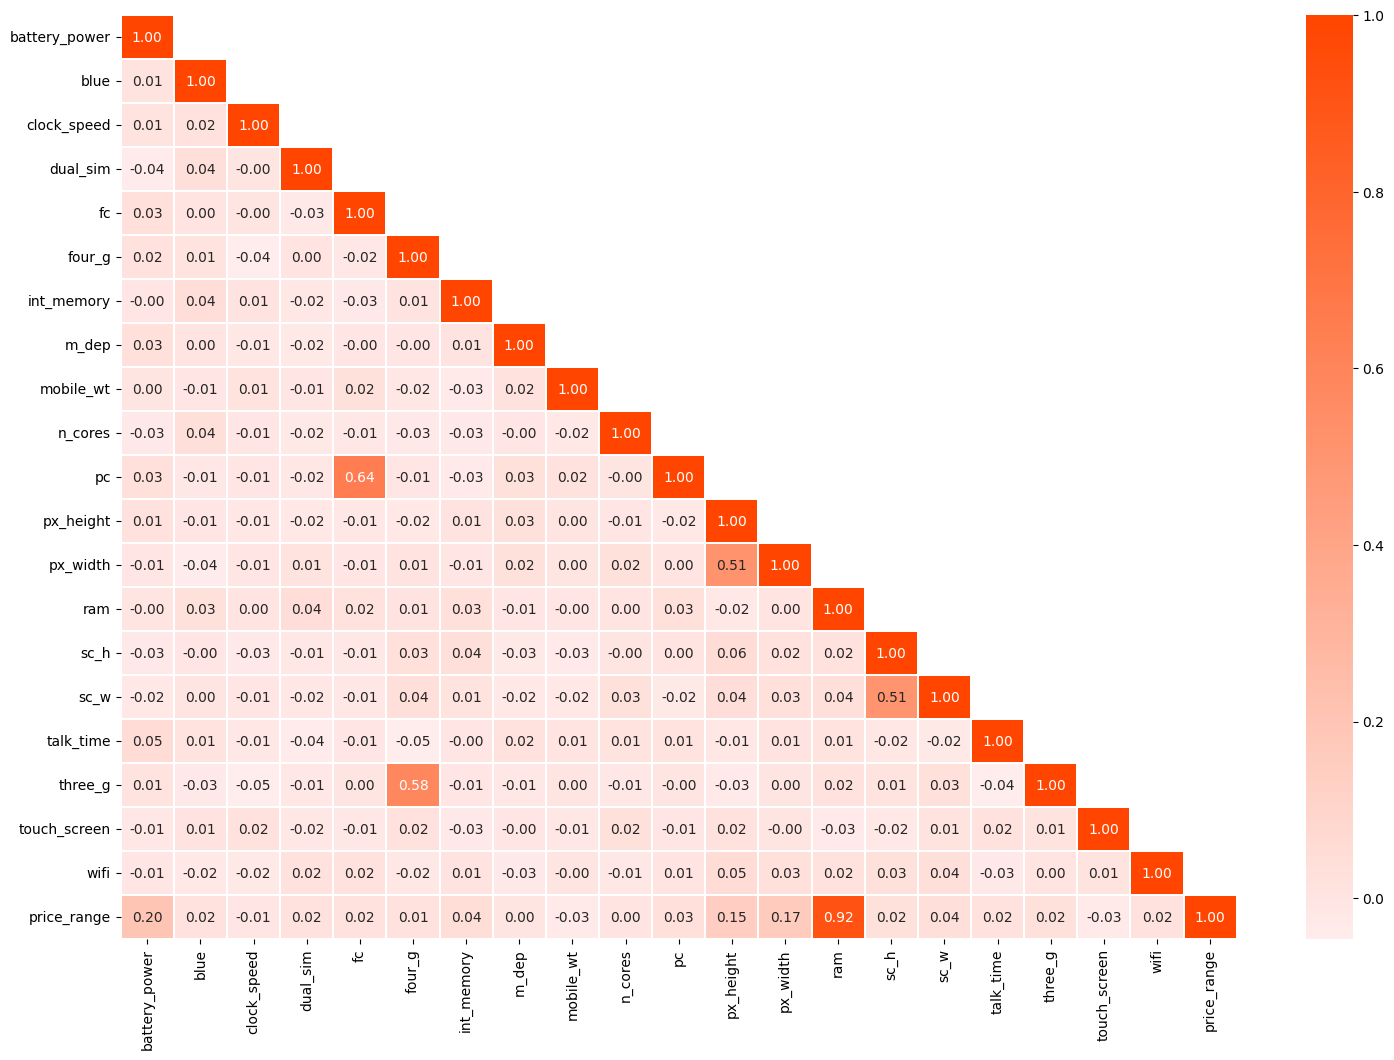

In [49]:
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])
target = 'price_range'
df_ordered = pd.concat([train.drop(target,axis=1), train[target]],axis=1)
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap=orangered_cmap, fmt='.2f', linewidths=0.2)
plt.show()

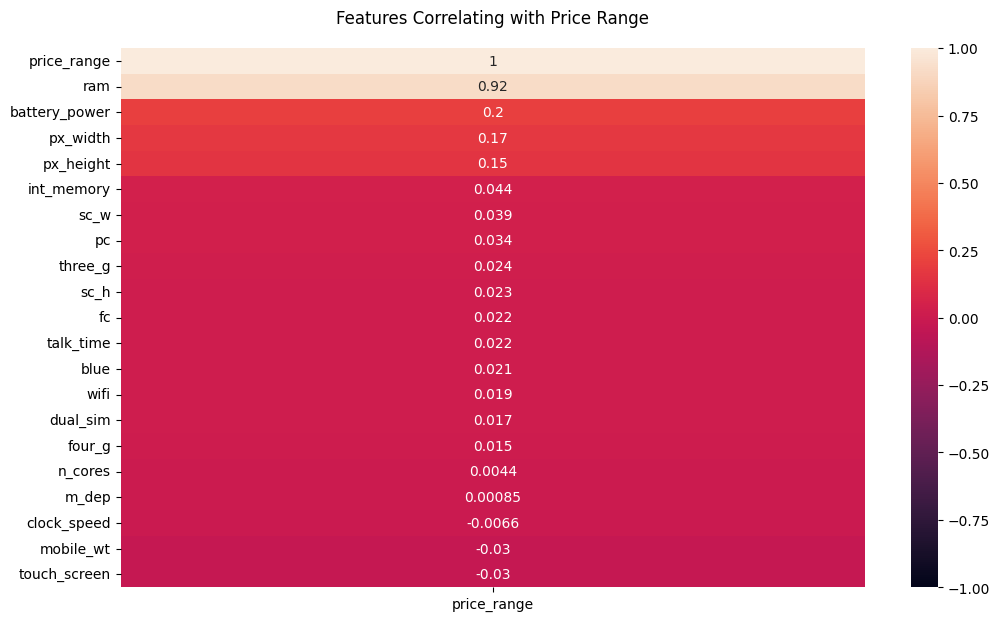

In [50]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (train.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);

### **Conclusion:**
There is a strong correlation between ram and price_range.
price_range has a low correlation value with the rest of the features, but this cannot be used as a criterion to remove these features since the pearson correlation only expresses the linear relationship between two variables.
We can see a moderate correlation between 4G and 3G, fc and pc, px_height and px_width, sc_h and sc_w.

### **Step 3.6 | Visualization of Train Features**

### **Step 3.6.1 | Visualization of Categorical Variables**

### **Count plot**

**A count plot shows the counts of observations in each categorical bin using bars.It can be thought of as a histogram across a categorical, instead of quantitative, variable.**

In [51]:
def create_countplot(x,data):
    ax = sns.countplot(x=x, data=data, palette = "flare")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()




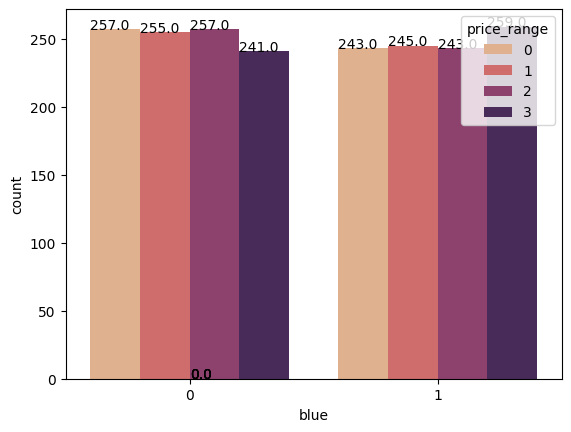

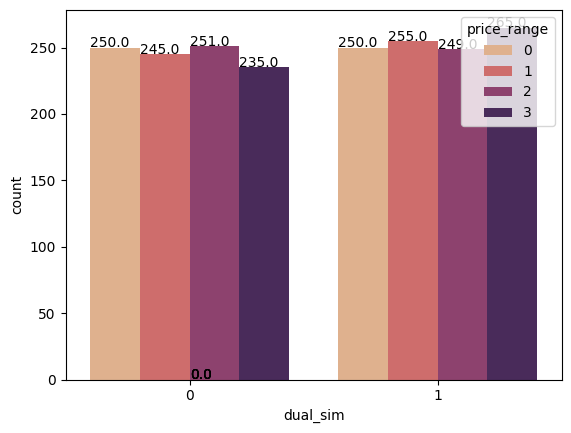

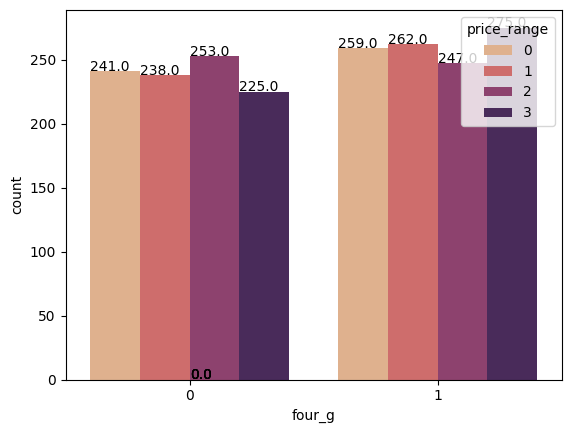

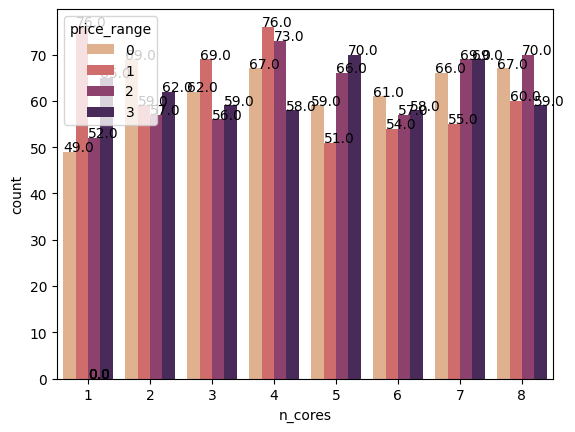

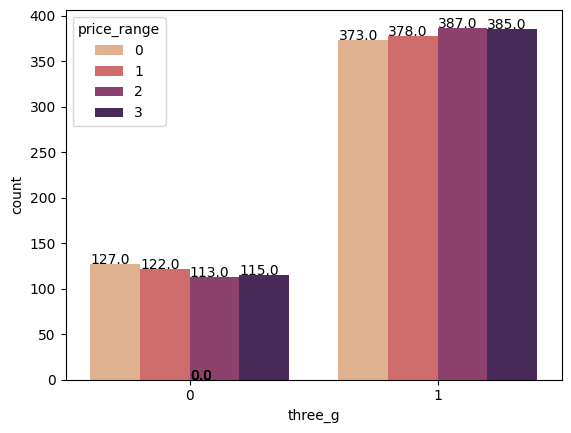

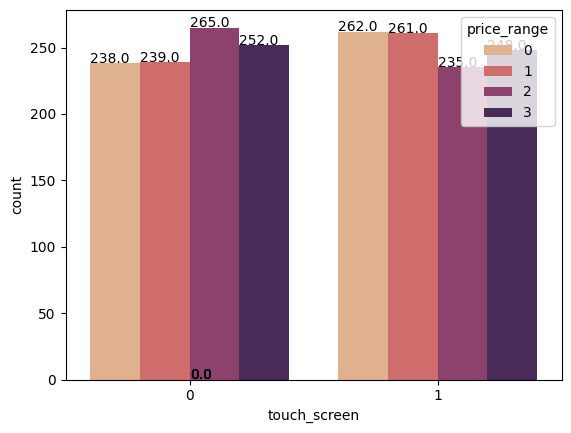

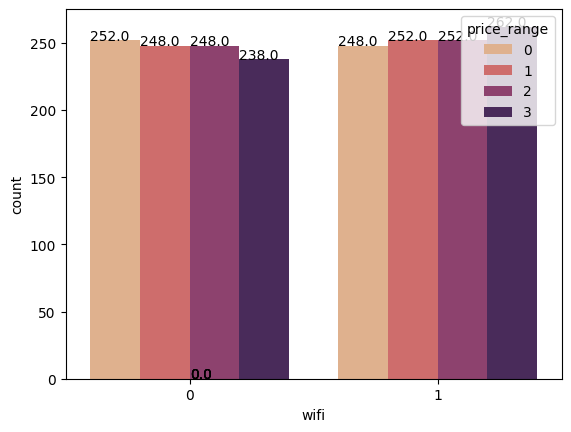

In [52]:
def create_countplothue(x,data):
    ax = sns.countplot(x=x, data=data, hue="price_range", palette = "flare")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.1))
    plt.show()


for feature in ["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi"]:
    create_countplothue(x = feature, data = train)

In [53]:
train.price_range.unique()

array([1, 2, 3, 0])

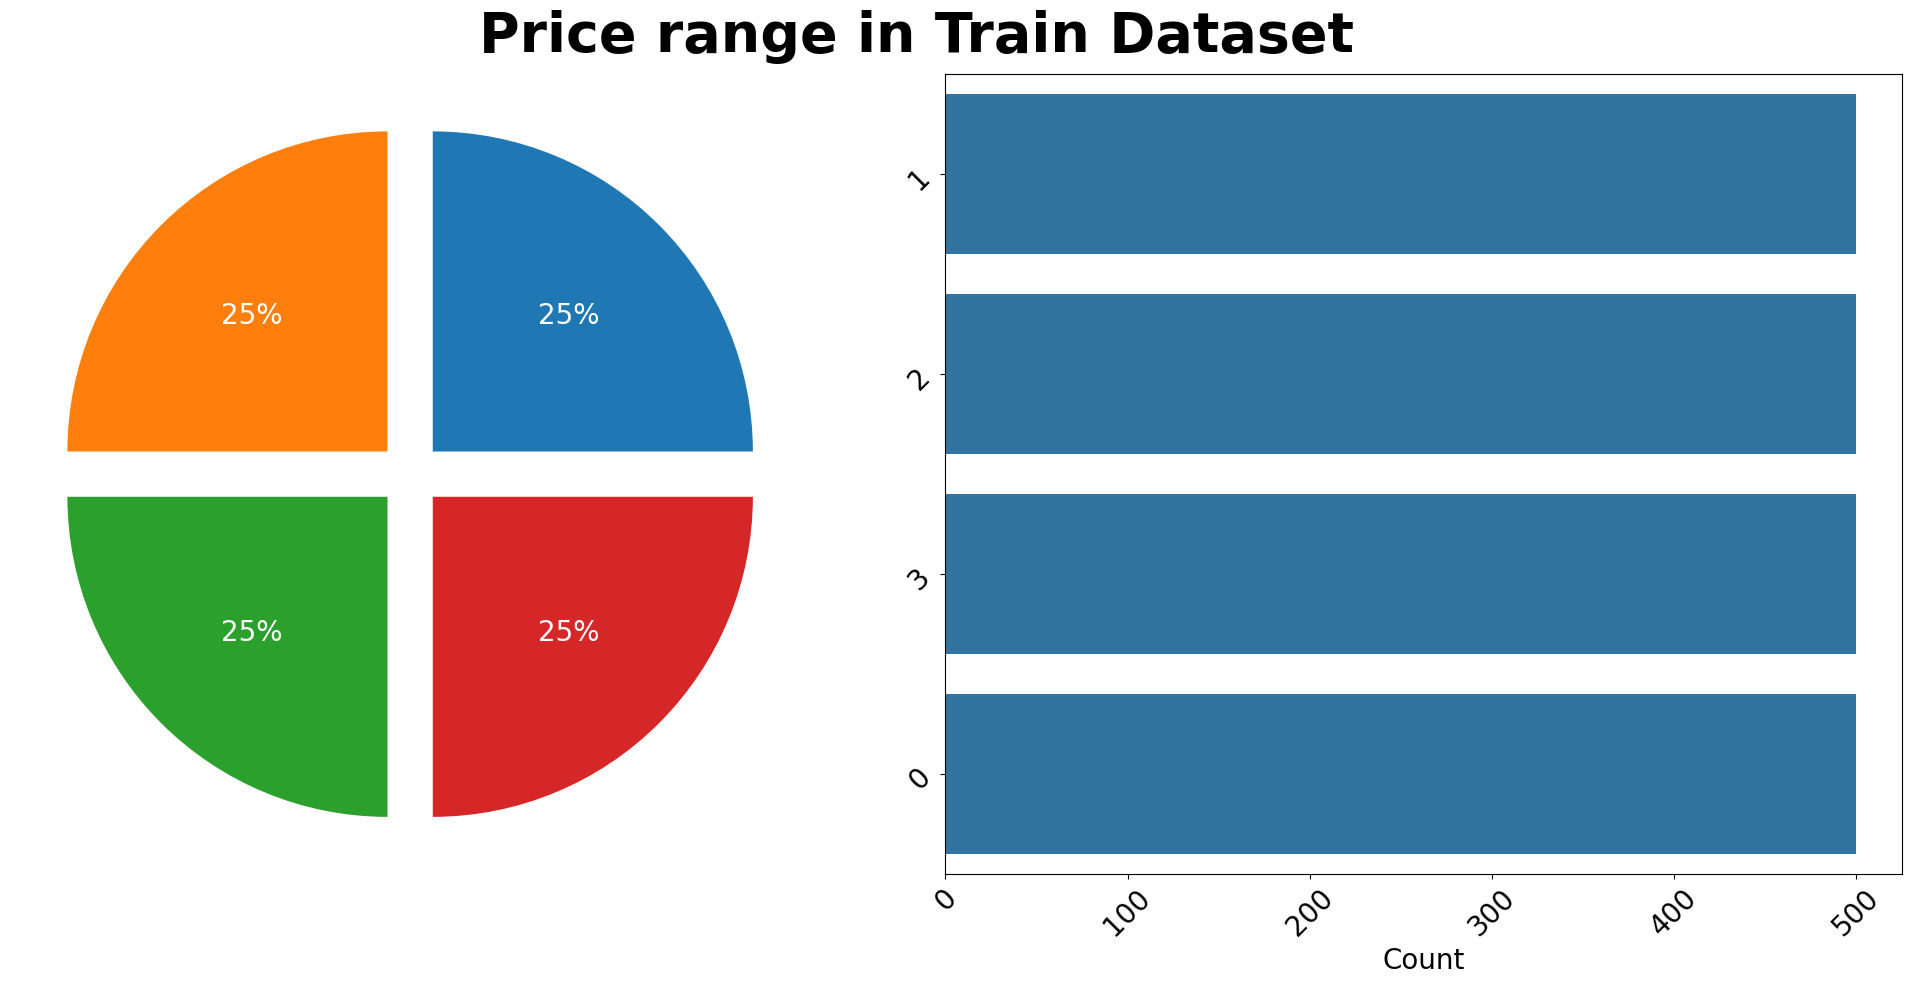

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax = ax.flatten()

ax[0].pie(
    train['price_range'].value_counts(),
    autopct = '%1.f%%',
    textprops = {'size' : 20, 'color' : 'white'},
    explode = [.1 for i in range(0, 4)],
    )

sns.countplot(data = train, y = 'price_range', ax = ax[1], order = train['price_range'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 20,rotation=45)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 20, rotation=45)

fig.suptitle('Price range in Train Dataset', fontsize = 40, fontweight = 'bold')
plt.tight_layout()

### **Conclusion:**
Mobile phones are divided with the same frequency across the 4 price_range classes. Therefore, the dataset is completely balanced.
We see almost the same frequency in terms of having or not having Bluetooth, 4G, two SIM cards, touch screen and the number of processing cores used.
We see a big difference in terms of having or not having 3G.


### **Step 3.6.2 | Visualization of Numerical Variables**

## **Histogram**

**A histogram represents the distribution of one or more variables by counting the number of observations that fall within discrete bins**

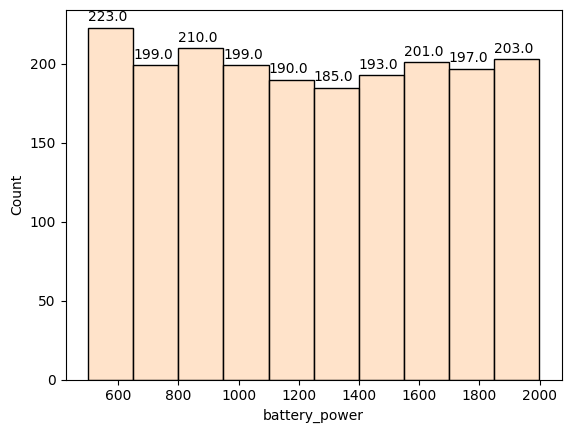

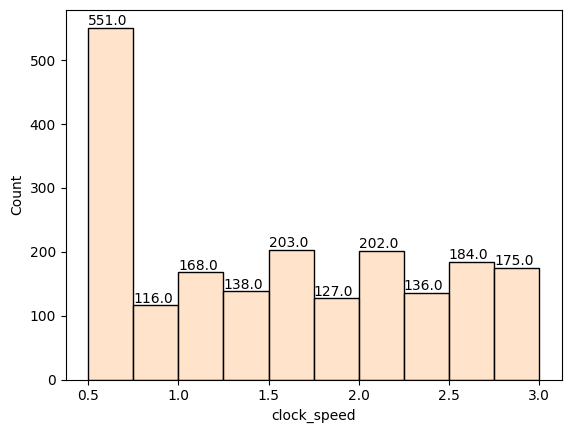

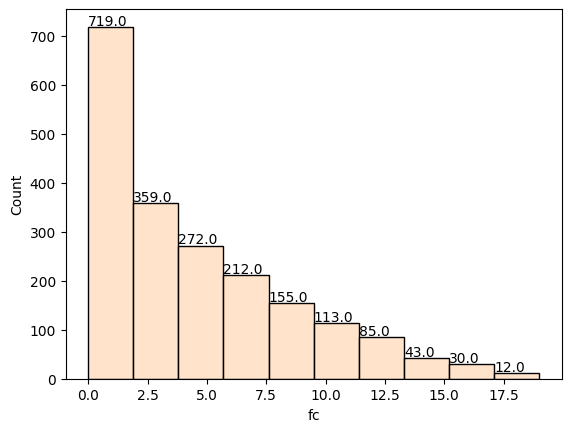

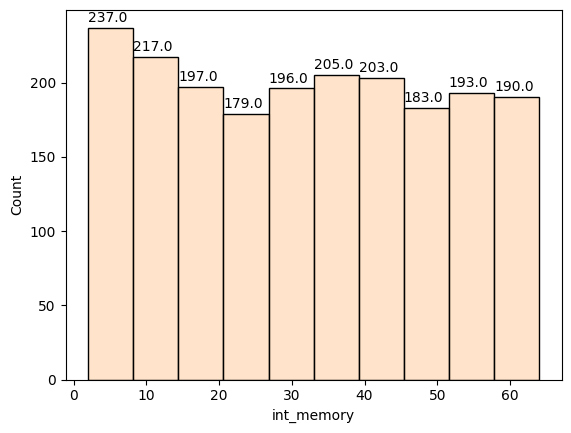

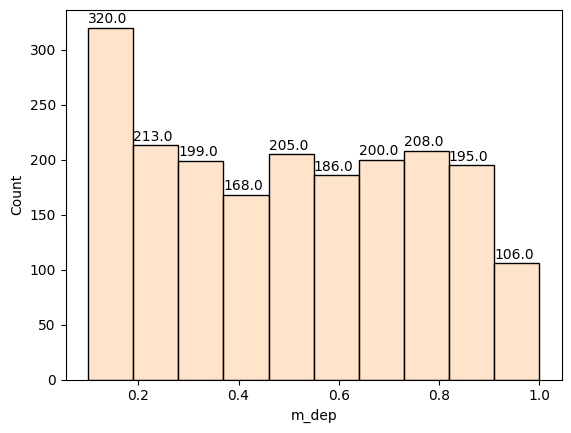

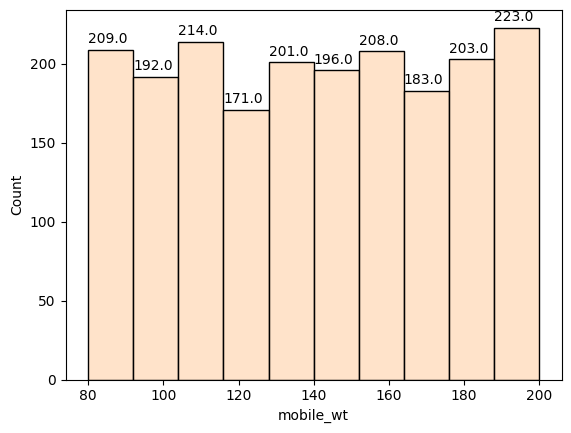

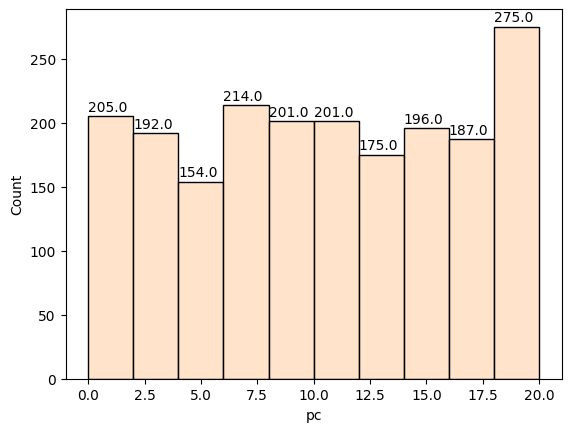

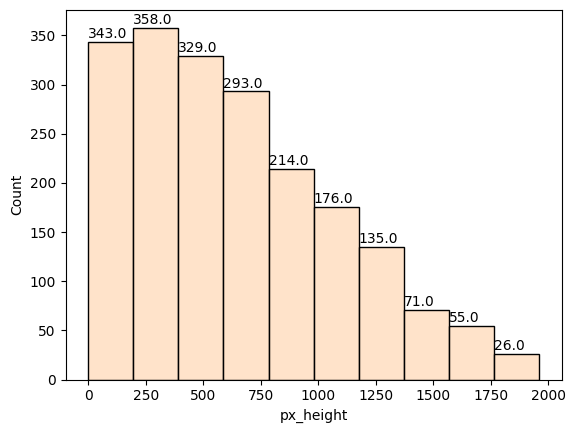

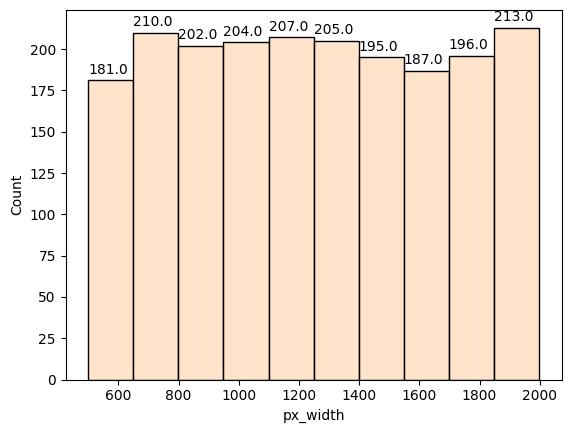

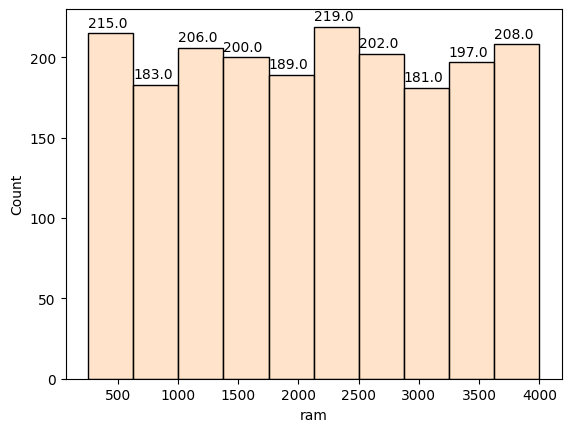

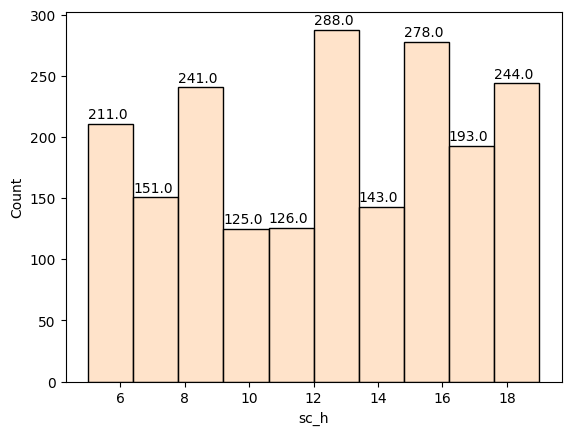

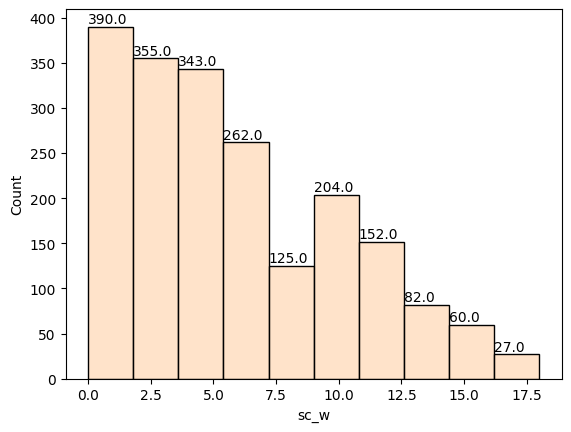

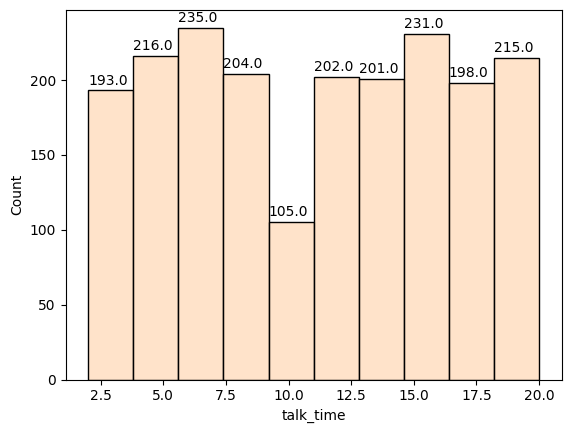

In [55]:
def create_histplot(x,data):
    ax = sns.histplot(x=x, data=data,color="peachpuff",bins=10)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+4))
    plt.show()

for feature in numerical:
    create_histplot(x = feature, data = train)

### **Box Plots**

**A box plot is a statistical representation of the distribution of a variable through its quartiles. The ends of the box represent the lower and upper quartiles, while the median (second quartile) is marked by a line inside the box.**

In [56]:
def create_boxplot(data,x,y):
    fig = px.box(data, x=x, y=y, color = "price_range", title = f"Box Plots\n{x} vs {y}")
    fig.show()

In [57]:
for feature in numerical:
    create_boxplot(data=train,y=feature,x="price_range")

**Each scatter plot in the matrix show correlation between the numerical features. The main diagonal contains the histograms for each attribute.**

In [ ]:
scatter_matrix(train[numerical],figsize=(30,30))
plt.show()

### **Density Plots**

Density plots are the continuous and smoothed version of the Histogram that are used to observe the distribution of a variable in data set. The peaks of a Density Plot indicate where values are concentrated over an interval. Compared to Histograms, Density Plots are better at determining the distribution shape because they’re not affected by the number of bins.

In [ ]:
def displot(data,x):
    sns.displot(data=data,x=x,kde=True,bins=40, color="orange", height=6).set(title=(f"Density Plot\n{x}"))


for feature in numerical:
    displot(data=train, x = feature)

### **Conclusion:**
By looking at the histograms and density plots, we can easily understand the statistical values of each feature, including the minimum and maximum values, and the average and standard deviation.
By looking at the box plots, in some features, including fc , px_height, sc_w and ram we can see outliers that distant from the rest of the data.

### **Step 3.7 | Models**

In [ ]:
X = train.drop(columns=['price_range'])
y = train.price_range
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [ ]:
def metrics_calculator(clf, X_valid, y_valid, model_name):
    y_pred = clf.predict(X_valid)
    result = pd.DataFrame(data=[accuracy_score(y_valid, y_pred),
                                precision_score(y_valid, y_pred, average='macro'),
                                recall_score(y_valid, y_pred, average='macro'),
                                f1_score(y_valid, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_valid, y_train, y_valid, model_name):
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))
    y_pred_valid = clf.predict(X_valid)
    print("\n\t   Classification report for valid set")
    print("-"*55)
    print(classification_report(y_valid, y_pred_valid))
    print('\n')
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))

    result = metrics_calculator(clf, X_valid, y_valid, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')

    ConfusionMatrixDisplay.from_estimator(clf, X_valid, y_valid, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')
    ax2.grid(False)
    plt.tight_layout()
    plt.show()

### **Step 3.7.1 | Decision Tree Classifier**
A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization.

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
prediction_tree = decision_tree.predict(X_valid)
as_tree = accuracy_score(y_valid,prediction_tree)
model_evaluation(decision_tree, X_train, X_valid, y_train, y_valid, 'Decision Tree Classifier')

In [ ]:
model_evaluation(decision_tree, X_train, X_valid, y_train, y_valid, 'Decision Tree Classifier')

### **Step 3.7.2 | Random Forest Classifier**
Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [ ]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(X_train, y_train)
predictions_forest = forest_model.predict(X_valid)
as_forest = accuracy_score(y_valid, predictions_forest)

In [ ]:
model_evaluation(forest_model, X_train, X_valid, y_train, y_valid, 'Random Forest Classifier')

### **Step 3.7.3 | XGBoost Classifier**
XGBoost classifier is a Machine learning algorithm that is applied for structured and tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
model_xgboost = XGBClassifier(n_estimators=100, random_state=0, learning_rate=0.05)
model_xgboost.fit(X_train, y_train)
predictions_xgboost = model_xgboost.predict(X_valid)
as_xgboost = accuracy_score(y_valid, predictions_xgboost)

In [ ]:
model_evaluation(model_xgboost, X_train, X_valid, y_train, y_valid, 'XGBoost Classifier')

### **Step 4 | Model Performance Comparison**

In [ ]:
models = ["Decision Tree","Random Forest","XGBoost"]
accuracy_scores = [as_tree,as_forest,as_xgboost]
df = pd.DataFrame({"Model":models,
                   "Accuracy score":accuracy_scores})
df.plot(x="Model",y="Accuracy score", figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

### **Conclusion:**
XGBoost Classifier get the best accuracy score.